<a href="https://colab.research.google.com/github/PabloEsteban0201/PredictionModel_of_PotatoProduction/blob/main/Preparaci%C3%B3n_de_datos.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **ETAPAS PREPARACION DE DATOS**

Primero revisar que los rendimientos estén bien calculado 


Revisar que los semestres A y B coincidan con los periodos

Graficar columna de producción inicial

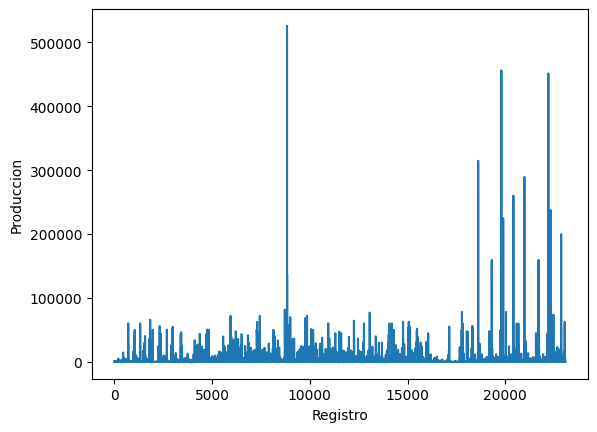

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Leer el archivo CSV
df_original = pd.read_csv('./sample_data/dataset.csv')

# Seleccionar la columna que se desea graficar
columna = df_original['Produccion (t)']

# Graficar los datos
plt.plot(columna)

# Agregar etiquetas al eje x y al eje y
plt.xlabel('Registro')
plt.ylabel('Produccion')

# Mostrar el gráfico
plt.show()


### Número de registros iniciales

In [ ]:
# Obtener el número de registros
num_registros = df_original.shape[0]

print("Número de registros:", num_registros)

Número de registros: 23080


In [ ]:
#print(df_original.head(20))

# 1.Deteccion de valores faltantes

## Validación columna Rendimiento

In [ ]:
import pandas as pd

# Leer el archivo CSV
df = pd.read_csv('./sample_data/dataset.csv')

# Definir las columnas
columna1 = df['Produccion (t)']
columna2 = df['Area Cosechada (ha)']
columna3 = df['Rendimiento (t/ha)']

# Calcular la división de las dos primeras columnas
division = columna1 / columna2

# Verificar si la columna 3 es igual a la división calculada
validacion = columna3 != division

# Contar el número de filas en las que la validación es verdadera
contador = validacion.sum()

# Crear un nuevo dataframe con las filas donde se cumple la validación
df_valido = df[validacion]

# Imprimir el nuevo dataframe
print(df_valido)

# Imprimir el resultado
print(f'Hay {contador} filas en las que la columna 3 es diferente a la división de las columnas 1 y 2.')


                       TIPO           MUNICIPIO     CULTIVO PERIODO  \
6      CULTIVOS PERMANENTES          COVARACHIA    AGUACATE    2015   
18     CULTIVOS PERMANENTES              RONDON    AGUACATE    2015   
37     CULTIVOS PERMANENTES               NOBSA       BREVO    2015   
53     CULTIVOS PERMANENTES  SAN LUIS DE GACENO       CACAO    2015   
64     CULTIVOS PERMANENTES               CHITA        CAFE    2015   
...                     ...                 ...         ...     ...   
23068            Permanente           Zetaquirá        Café    2021   
23070            Permanente           Zetaquirá    Aguacate    2021   
23072            Permanente           Zetaquirá    Pitahaya    2021   
23074            Permanente           Zetaquirá  Granadilla    2021   
23079           Transitorio           Zetaquirá      Frijol   2021B   

       Area Sembrada (ha)  Area Cosechada (ha)  Produccion (t)  \
6                     8.0                  NaN             NaN   
18             

Importante al principio se tenían 4232 filas mal calculadas y con valores anomalos

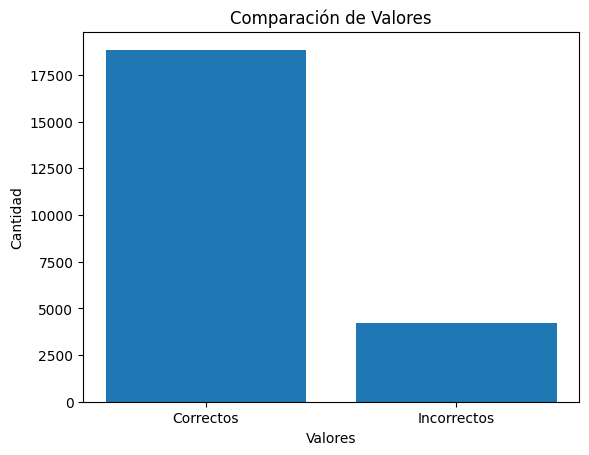

In [ ]:
import matplotlib.pyplot as plt

# Datos
categorias = ['Correctos', 'Incorrectos']

datosCorrectos = len(df_original)-contador

datos = [datosCorrectos, contador]

# Configurar la figura y los ejes
fig, ax = plt.subplots()

# Crear la gráfica de barras
ax.bar(categorias, datos)

# Configurar etiquetas y título
ax.set_xlabel('Valores')
ax.set_ylabel('Cantidad')
ax.set_title('Comparación de Valores')

# Mostrar la gráfica
plt.show()

In [ ]:
import pandas as pd
import numpy as np
from sklearn.feature_selection import SelectKBest, f_classif

data = pd.read_csv('./sample_data/dataset.csv')

# Verificar si hay valores faltantes
print("Valores faltantes:\n", data.isnull().sum())



Valores faltantes:
 TIPO                     0
MUNICIPIO                0
CULTIVO                  0
PERIODO                  0
Area Sembrada (ha)       0
Area Cosechada (ha)    206
Produccion (t)         219
Rendimiento (t/ha)     231
dtype: int64


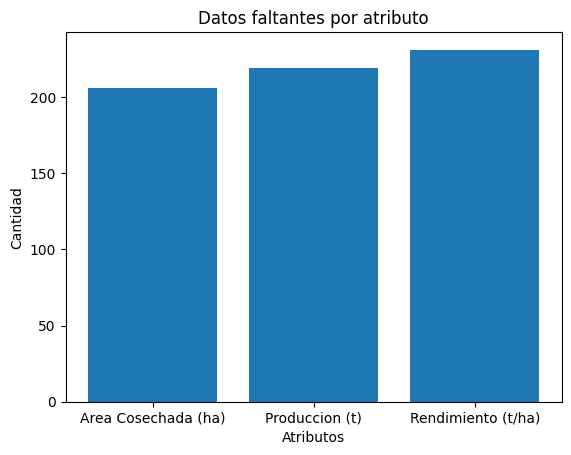

In [ ]:
import matplotlib.pyplot as plt

# Datos
categorias = ['Area Cosechada (ha)', 'Produccion (t)','Rendimiento (t/ha)']


datos = [206,219,231]

# Configurar la figura y los ejes
fig, ax = plt.subplots()

# Crear la gráfica de barras
ax.bar(categorias, datos)


# Configurar etiquetas y título
ax.set_xlabel('Atributos')
ax.set_ylabel('Cantidad')
ax.set_title('Datos faltantes por atributo')

# Mostrar la gráfica
plt.show()

## Encontrar registros con un solo valor nulo

In [ ]:
import pandas as pd

# Cargar el dataset desde el archivo CSV
dataFrame_Boyaca = pd.read_csv('./sample_data/dataset.csv')

#Seleccionar columnas específicas para el analisis
selected_cols = dataFrame_Boyaca[['Area Cosechada (ha)', 'Produccion (t)','Rendimiento (t/ha)']]

#Crear dataframe a partir de los nulos y no nulos
null_mask = selected_cols.isnull()

#Contar número de valores nulos
null_counts = null_mask.sum()

#Se crea una serie de los registros que tengan un solo valor nulo
any_null = null_mask.any(axis=1)

#Se crea un dataframe que filtra los registros que tienen un solo valor nulo
one_null = selected_cols[any_null & (null_mask.sum(axis=1) == 1)]

more_than_one_null = selected_cols[any_null & (null_mask.sum(axis=1) >1)]

#Se obtiene el dataframe con un solo valor nulo
df_un_nulo = one_null.copy()

df_valores_nulos = more_than_one_null.copy()

#Mostrar en pantalla
print(df_un_nulo)

print(df_valores_nulos)



       Area Cosechada (ha)  Produccion (t)  Rendimiento (t/ha)
4780                   1.0            11.5                 NaN
5240                   0.0             0.0                 NaN
6867                   0.0             0.0                 NaN
6982                   0.0             0.0                 NaN
7784                   0.0             0.0                 NaN
8050                   0.0             0.0                 NaN
8359                   0.0             0.0                 NaN
8944                   0.0             0.0                 NaN
9262                   0.0             0.0                 NaN
10423                150.0             NaN               112.0
10669                 23.0             NaN                 0.0
11093                  2.0             7.0                 NaN
11847                  0.0             0.0                 NaN
14265                  0.0             0.0                 NaN
       Area Cosechada (ha)  Produccion (t)  Rendimiento

## Eliminar registros con más de un valor nulo

In [ ]:
# Obtener los índices que deben eliminarse
indices_a_eliminar = df_valores_nulos.index

# Eliminar los registros de df1 basándose en los índices
dataFrame_Boyaca = dataFrame_Boyaca.drop(indices_a_eliminar)


In [ ]:
#Comprobar que el registro se elimmino
print("\n ----------------------")

print(dataFrame_Boyaca.loc[7])


 ----------------------
TIPO                   CULTIVOS PERMANENTES
MUNICIPIO                         EL ESPINO
CULTIVO                            AGUACATE
PERIODO                                2015
Area Sembrada (ha)                      5.0
Area Cosechada (ha)                     1.5
Produccion (t)                         15.0
Rendimiento (t/ha)                     10.0
Name: 7, dtype: object


## Eliminar registros que tengan una columna con valor nulo y alguna de las dos columnas con valor 0 


In [ ]:
df_un_nulo

#Filtrar los registros que cumplan la condición
df_filtrado = df_un_nulo.loc[(df_un_nulo['Area Cosechada (ha)']==0) | (df_un_nulo['Produccion (t)']==0) | (df_un_nulo['Rendimiento (t/ha)']==0)]

#Mostrar en pantalla
print(df_filtrado)

       Area Cosechada (ha)  Produccion (t)  Rendimiento (t/ha)
5240                   0.0             0.0                 NaN
6867                   0.0             0.0                 NaN
6982                   0.0             0.0                 NaN
7784                   0.0             0.0                 NaN
8050                   0.0             0.0                 NaN
8359                   0.0             0.0                 NaN
8944                   0.0             0.0                 NaN
9262                   0.0             0.0                 NaN
10669                 23.0             NaN                 0.0
11847                  0.0             0.0                 NaN
14265                  0.0             0.0                 NaN


In [ ]:
# Obtener los índices que deben eliminarse
indices_a_eliminar = df_filtrado.index

# Eliminar los registros de df1 basándose en los índices
dataFrame_Boyaca = dataFrame_Boyaca.drop(indices_a_eliminar)

Con lo anterior se eliminan los registros que no aportan información

Comprobación de la eliminación

In [ ]:
#Comprobar que el registro se elimmino
print("\n ----------------------")

print(dataFrame_Boyaca.loc[5241])


 ----------------------
TIPO                   CULTIVOS TRANSITORIOS SEMESTRE B
MUNICIPIO                                          PAYA
CULTIVO                                          ARVEJA
PERIODO                                           2014B
Area Sembrada (ha)                                  4.0
Area Cosechada (ha)                                 3.0
Produccion (t)                                      4.2
Rendimiento (t/ha)                                  1.4
Name: 5241, dtype: object


## Guardar registros a estimar (Valor faltante)

In [ ]:
# Obtener los índices que deben eliminarse
indices_a_eliminar = df_filtrado.index

# Eliminar los registros de df1 basándose en los índices
df_valores_faltantes = df_un_nulo.drop(indices_a_eliminar)

In [ ]:
print(df_valores_faltantes)

       Area Cosechada (ha)  Produccion (t)  Rendimiento (t/ha)
4780                   1.0            11.5                 NaN
10423                150.0             NaN               112.0
11093                  2.0             7.0                 NaN


## Reparar datos

In [ ]:
# Realizar la reparación de valores faltantes
df_valores_corregidos= df_valores_faltantes.copy()

valor_faltante = 0 


for index, row in df_valores_corregidos.iterrows():
  if pd.isnull(df_valores_corregidos.loc[index,'Area Cosechada (ha)']) :
    valor_faltante = row['Rendimiento (t/ha)']*row['Produccion (t)']
    df_valores_corregidos.loc[index, 'Area Cosechada (ha)'] = valor_faltante

  elif pd.isnull(df_valores_corregidos.loc[index,'Produccion (t)']):
    valor_faltante = row['Rendimiento (t/ha)']*row['Area Cosechada (ha)']
    df_valores_corregidos.loc[index, 'Produccion (t)'] = valor_faltante

  else:
    valor_faltante = row['Produccion (t)']/row['Area Cosechada (ha)']
    df_valores_corregidos.loc[index, 'Rendimiento (t/ha)'] = valor_faltante

  print("\n")
  valor_faltante = 0 

print(df_valores_corregidos)









       Area Cosechada (ha)  Produccion (t)  Rendimiento (t/ha)
4780                   1.0            11.5                11.5
10423                150.0         16800.0               112.0
11093                  2.0             7.0                 3.5


## Reemplazar valores reparados

In [ ]:
dataFrame_Boyaca.update(df_valores_corregidos)

# Verificar si hay valores nulos en el dataframe
hay_nulos = dataFrame_Boyaca.isnull().any()

# Mostrar los resultados
print(hay_nulos)

TIPO                   False
MUNICIPIO              False
CULTIVO                False
PERIODO                False
Area Sembrada (ha)     False
Area Cosechada (ha)    False
Produccion (t)         False
Rendimiento (t/ha)     False
dtype: bool


## Comprobación valores NAN


In [ ]:
hay_nulos = dataFrame_Boyaca.isna().any()
recuento_nulos = dataFrame_Boyaca.isna().sum()
print(recuento_nulos)

TIPO                   0
MUNICIPIO              0
CULTIVO                0
PERIODO                0
Area Sembrada (ha)     0
Area Cosechada (ha)    0
Produccion (t)         0
Rendimiento (t/ha)     0
dtype: int64


In [ ]:
# Verificar si hay valores faltantes
print("Valores faltantes:\n", dataFrame_Boyaca.isnull().sum())


Valores faltantes:
 TIPO                   0
MUNICIPIO              0
CULTIVO                0
PERIODO                0
Area Sembrada (ha)     0
Area Cosechada (ha)    0
Produccion (t)         0
Rendimiento (t/ha)     0
dtype: int64


### Codigo para contar valores con valor 0

In [ ]:
# Contar registros con valor igual a 0 en todas las columnas
registros_con_0 = (dataFrame_Boyaca == 0).sum()

print("Total de registros con valor igual a 0:", (dataFrame_Boyaca == 0).sum())

Total de registros con valor igual a 0: TIPO                     0
MUNICIPIO                0
CULTIVO                  0
PERIODO                  0
Area Sembrada (ha)      84
Area Cosechada (ha)    273
Produccion (t)         258
Rendimiento (t/ha)     286
dtype: int64


In [ ]:
print(dataFrame_Boyaca.loc[11093])

TIPO                   CULTIVOS PERMANENTES
MUNICIPIO                          PAJARITO
CULTIVO                             GUANDUL
PERIODO                                2016
Area Sembrada (ha)                      5.0
Area Cosechada (ha)                     2.0
Produccion (t)                          7.0
Rendimiento (t/ha)                      3.5
Name: 11093, dtype: object


## Conteo total de registros

In [ ]:
print(len(dataFrame_Boyaca))

total_count=len(df_original)-len(dataFrame_Boyaca)

print("El número de registros que se han borrado son: ", total_count)

22850
El número de registros que se han borrado son:  230


## Eliminar registros que tengan las 3 columnas con valores en 0


In [ ]:


# Columnas a verificar
columnas = ['Area Cosechada (ha)', 'Produccion (t)','Rendimiento (t/ha)']

# Filtrar los registros que tienen cero en las columnas dadas
registros_con_ceros = dataFrame_Boyaca[(dataFrame_Boyaca[columnas] == 0).all(axis=1)]

# Mostrar los registros con ceros
print(registros_con_ceros)


                                   TIPO  MUNICIPIO                CULTIVO  \
2510               CULTIVOS PERMANENTES       PÁEZ           LIMON TAHITI   
14395  CULTIVOS TRANSITORIOS SEMESTRE A       TOTA       CEBOLLA DE BULBO   
14687  CULTIVOS TRANSITORIOS SEMESTRE A    SUSACÓN           TABACO RUBIO   
14867  CULTIVOS TRANSITORIOS SEMESTRE A    CIÉNEGA                  AVENA   
14874  CULTIVOS TRANSITORIOS SEMESTRE B   TIBASOSA                 TOMATE   
...                                 ...        ...                    ...   
23001                        Permanente     Úmbita                Ciruela   
23002                        Permanente     Úmbita  Durazno o Albaricoque   
23004                        Permanente     Úmbita               Aguacate   
23070                        Permanente  Zetaquirá               Aguacate   
23072                        Permanente  Zetaquirá               Pitahaya   

      PERIODO  Area Sembrada (ha)  Area Cosechada (ha)  Produccion (t)  \
2

Obtener los indices

In [ ]:
# Obtener los índices que deben eliminarse
indices_a_eliminar = registros_con_ceros.index

print(indices_a_eliminar)

# Eliminar los registros de df1 basándose en los índices
dataFrame_Boyaca = dataFrame_Boyaca.drop(indices_a_eliminar)

Int64Index([ 2510, 14395, 14687, 14867, 14874, 14988, 14989, 14997, 14998,
            15000,
            ...
            22683, 22686, 22688, 22690, 22865, 23001, 23002, 23004, 23070,
            23072],
           dtype='int64', length=239)


Comprobación

In [ ]:
#No sirve debido a que se elimino el registro
#print(dataFrame_Boyaca.loc[22688])



## Buscar Registros con Produccion con valor de 0

In [ ]:
# Definir las columnas
columna1 = dataFrame_Boyaca['Produccion (t)']
columna2 = dataFrame_Boyaca['Area Cosechada (ha)']
columna3 = dataFrame_Boyaca['Rendimiento (t/ha)']

# Verificar si la columna 3 es igual a la división calculada
validacion = columna1 == 0

# Contar el número de filas en las que la validación es verdadera
contador = validacion.sum()

# Crear un nuevo dataframe con las filas donde se cumple la validación
df_produCero = dataFrame_Boyaca[validacion]

#CUANTOS VALORES HAY EN 0
print("Valores con produccion en 0, total: ", contador)

Valores con produccion en 0, total:  19


In [ ]:
print(df_produCero)

                                   TIPO            MUNICIPIO  \
3885   CULTIVOS TRANSITORIOS SEMESTRE A            TIPACOQUE   
20993                        Permanente           Chitaraque   
21010                       Transitorio              Chivatá   
21073                       Transitorio             Corrales   
21282                        Permanente             Floresta   
21451                       Transitorio               Jericó   
21532                        Permanente             La Uvita   
21533                        Permanente             La Uvita   
21673                        Permanente               Monguí   
22020                       Transitorio                Pisba   
22117                        Permanente               Rondón   
22118                        Permanente               Rondón   
22120                        Permanente               Rondón   
22205                        Permanente     San José de Pare   
22297                        Permanente 

## Elminar registros con producción de 0

No aporta gran información y solo hay 19 registros que tienen esta peculiaridad

In [ ]:
# Obtener los índices que deben eliminarse
indices_a_eliminar = df_produCero.index

print(len(indices_a_eliminar))
print(indices_a_eliminar)
# Eliminar los registros de df1 basándose en los índices
dataFrame_Boyaca = dataFrame_Boyaca.drop(indices_a_eliminar)

19
Int64Index([ 3885, 20993, 21010, 21073, 21282, 21451, 21532, 21533, 21673,
            22020, 22117, 22118, 22120, 22205, 22297, 22428, 22438, 22540,
            22998],
           dtype='int64')


Comprobacion de la eliminación

In [ ]:
#No sirve debido a que se elimino el registro
#print(dataFrame_Boyaca.loc[3885])

## Buscar rendimientos con valor de 0

In [ ]:
# Definir las columnas
produc = dataFrame_Boyaca['Produccion (t)']
area = dataFrame_Boyaca['Area Cosechada (ha)']
rendi = dataFrame_Boyaca['Rendimiento (t/ha)']

# Verificar si la columna 3 es igual a 0
validacion = rendi == 0

# Contar el número de filas en las que la validación es verdadera
contador = validacion.sum()

# Crear un nuevo dataframe con las filas donde se cumple la validación
df_rendimientosCero = dataFrame_Boyaca[validacion]

#CUANTOS VALORES HAY EN 0
print("Valores con rendimiento en 0, total: ", contador)

Valores con rendimiento en 0, total:  43


In [ ]:
print(df_rendimientosCero)

              TIPO              MUNICIPIO   CULTIVO PERIODO  \
20724  Transitorio                  Belén      Haba   2021A   
20732   Permanente                 Berbeo     Cacao    2021   
20819   Permanente             Buenavista     Cacao    2021   
20872  Transitorio           Campohermoso      Maíz   2021B   
20873   Permanente           Campohermoso     Cacao    2021   
20926  Transitorio           Chiquinquirá      Maíz   2021A   
20937  Transitorio           Chiquinquirá      Haba   2021A   
20980  Transitorio             Chitaraque      Maíz   2021A   
20981  Transitorio             Chitaraque      Maíz   2021B   
21113   Permanente                 Cubará     Cacao    2021   
21235  Transitorio               El Cocuy      Haba   2021A   
21328  Transitorio                Garagoa    Arveja   2021A   
21450  Transitorio                 Jericó    Cebada   2021A   
21452  Transitorio                 Jericó      Maíz   2021A   
21487   Permanente             La Capilla      Café    

## Corrección de valores con rendimiento mal calculado en 0

In [ ]:
#Crear una copia
df_correccion= df_rendimientosCero.copy()

In [ ]:


#Obtener el valor de rendimiento dividiendo produccion/area
# Definir las columnas
produc = df_correccion['Produccion (t)']
area = df_correccion['Area Cosechada (ha)']
#rendi = df_rendimientosCero['Rendimiento (t/ha)']

#calculo de rendimiento
rendi = produc/area

df_correccion.loc[:,'Rendimiento (t/ha)'] = df_correccion['Produccion (t)']/df_correccion['Area Cosechada (ha)']

print(df_correccion)



              TIPO              MUNICIPIO   CULTIVO PERIODO  \
20724  Transitorio                  Belén      Haba   2021A   
20732   Permanente                 Berbeo     Cacao    2021   
20819   Permanente             Buenavista     Cacao    2021   
20872  Transitorio           Campohermoso      Maíz   2021B   
20873   Permanente           Campohermoso     Cacao    2021   
20926  Transitorio           Chiquinquirá      Maíz   2021A   
20937  Transitorio           Chiquinquirá      Haba   2021A   
20980  Transitorio             Chitaraque      Maíz   2021A   
20981  Transitorio             Chitaraque      Maíz   2021B   
21113   Permanente                 Cubará     Cacao    2021   
21235  Transitorio               El Cocuy      Haba   2021A   
21328  Transitorio                Garagoa    Arveja   2021A   
21450  Transitorio                 Jericó    Cebada   2021A   
21452  Transitorio                 Jericó      Maíz   2021A   
21487   Permanente             La Capilla      Café    

In [ ]:
#Actualizar dataframe correido
dataFrame_Boyaca.update(df_correccion)


### Dataframe actualizado con rendimientos recalculados

In [ ]:
#Imprimir registro actualizado
print(dataFrame_Boyaca.loc[22939])

TIPO                   Transitorio
MUNICIPIO                 Turmequé
CULTIVO                       Haba
PERIODO                      2021A
Area Sembrada (ha)             4.0
Area Cosechada (ha)            4.0
Produccion (t)                 1.0
Rendimiento (t/ha)            0.25
Name: 22939, dtype: object


### Comprobacion de rendimientos con valor de 0

In [ ]:
# Definir las columnas
produc = dataFrame_Boyaca['Produccion (t)']
area = dataFrame_Boyaca['Area Cosechada (ha)']
rendi = dataFrame_Boyaca['Rendimiento (t/ha)']

# Verificar si la columna 3 es igual a 0
validacion = rendi == 0

# Contar el número de filas en las que la validación es verdadera
contador = validacion.sum()

#CUANTOS VALORES HAY EN 0
print("Valores con rendimiento en 0, total: ", contador)

Valores con rendimiento en 0, total:  0


## Buscar area cosechada en 0

In [ ]:
#Columna area
area = dataFrame_Boyaca['Area Cosechada (ha)']

# Verificar si area es igual a 0
validacion = area==0

# Contar el número de filas en las que la validación es verdadera
contador = validacion.sum()

#CUANTOS VALORES HAY EN 0
print("Valores con area en 0, total: ", contador)

# Crear un nuevo dataframe con las filas donde se cumple la validación
df_area_cero = dataFrame_Boyaca[validacion]

Valores con area en 0, total:  23


In [ ]:
print(df_area_cero)

              TIPO            MUNICIPIO                CULTIVO PERIODO  \
20877   Permanente         Campohermoso                   Mora    2021   
20911  Transitorio            Chinavita               Pimentón   2021A   
20988   Permanente           Chitaraque               Aguacate    2021   
21089   Permanente           Covarachía                  Limón    2021   
21093   Permanente           Covarachía                Naranja    2021   
21118   Permanente               Cubará                Naranja    2021   
21186  Transitorio               Chivor              Arracacha   2021A   
21187  Transitorio               Chivor              Arracacha   2021B   
21488   Permanente           La Capilla               Aguacate    2021   
21531   Permanente             La Uvita                  Limón    2021   
21534   Permanente             La Uvita              Mandarina    2021   
21538   Permanente             La Uvita                   Mora    2021   
21676   Permanente               Mongu

### Reparar areas cosechadas con valor de 0 pero con R y P con valores 

In [ ]:
#Crear una copia
df_correc_area= df_area_cero.copy()

In [ ]:
#recalcular los valores de la area cosechada
df_correc_area.loc[:,'Area Cosechada (ha)'] = df_correc_area['Produccion (t)']/df_correc_area['Rendimiento (t/ha)']

print(df_correc_area)

              TIPO            MUNICIPIO                CULTIVO PERIODO  \
20877   Permanente         Campohermoso                   Mora    2021   
20911  Transitorio            Chinavita               Pimentón   2021A   
20988   Permanente           Chitaraque               Aguacate    2021   
21089   Permanente           Covarachía                  Limón    2021   
21093   Permanente           Covarachía                Naranja    2021   
21118   Permanente               Cubará                Naranja    2021   
21186  Transitorio               Chivor              Arracacha   2021A   
21187  Transitorio               Chivor              Arracacha   2021B   
21488   Permanente           La Capilla               Aguacate    2021   
21531   Permanente             La Uvita                  Limón    2021   
21534   Permanente             La Uvita              Mandarina    2021   
21538   Permanente             La Uvita                   Mora    2021   
21676   Permanente               Mongu

In [ ]:
#Actualizar dataframe correido
dataFrame_Boyaca.update(df_correc_area)

### Comprobacion datos reparados

In [ ]:
print(dataFrame_Boyaca.loc[21531])

TIPO                   Permanente
MUNICIPIO                La Uvita
CULTIVO                     Limón
PERIODO                      2021
Area Sembrada (ha)            0.0
Area Cosechada (ha)      0.111111
Produccion (t)                1.0
Rendimiento (t/ha)            9.0
Name: 21531, dtype: object


## Revisión validación de rendimiento

In [ ]:
# Definir las columnas
produ = dataFrame_Boyaca['Produccion (t)']
area = dataFrame_Boyaca['Area Cosechada (ha)']
rendi = dataFrame_Boyaca['Rendimiento (t/ha)']

# Calcular la división de las dos primeras columnas
division = produ / area

In [ ]:
# Aplicar una resta de división y rendi
sesgo= division - rendi

# Verificar que la diferencia sea mayor que 0.1
# Es decir que 
validacion = sesgo > 0.1

# Contar el número de filas en las que la validación es verdadera
contador = validacion.sum()

# Crear un nuevo dataframe con las filas donde se cumple la validación
df_rendi_mal = dataFrame_Boyaca[validacion]

# Imprimir el nuevo dataframe
#print(df_valoresIncorrectos)

# Imprimir el resultado
print(f'Hay {contador} filas en las que el rendimiento es diferente a P/A.')


Hay 503 filas en las que el rendimiento es diferente a P/A.


### Número de registros finales

In [ ]:
#Conteo de registros
# Obtener el número de registros
num_registros = dataFrame_Boyaca.shape[0]

print("Número de registros:", num_registros)

Número de registros: 22592


## Eliminación de columna de rendimiento

In [ ]:
df_BoyacaMD = dataFrame_Boyaca.copy()

In [ ]:
# Eliminar la columna 'Columna2'
df_BoyacaMD = df_BoyacaMD.drop('Rendimiento (t/ha)', axis=1)

print(df_BoyacaMD.head(10))

                                TIPO    MUNICIPIO   CULTIVO PERIODO  \
0               CULTIVOS PERMANENTES      RAQUIRA     AGRAZ    2015   
1   CULTIVOS TRANSITORIOS SEMESTRE A     BUSBANZA   AHUYAMA   2018A   
2               CULTIVOS PERMANENTES   BUENAVISTA  AGUACATE    2015   
3               CULTIVOS PERMANENTES        COPER  AGUACATE    2015   
4               CULTIVOS PERMANENTES        COPER  AGUACATE    2015   
5               CULTIVOS PERMANENTES        COPER  AGUACATE    2015   
7               CULTIVOS PERMANENTES    EL ESPINO  AGUACATE    2015   
8               CULTIVOS PERMANENTES     JENESANO  AGUACATE    2015   
9               CULTIVOS PERMANENTES  LA VICTORIA  AGUACATE    2015   
10              CULTIVOS PERMANENTES   MIRAFLORES  AGUACATE    2015   

    Area Sembrada (ha)  Area Cosechada (ha)  Produccion (t)  
0                170.0                170.0          1360.0  
1                  0.5                  0.4             2.0  
2                 40.0          

## Graficar Produccion luego de borrar y agregar valores faltantes

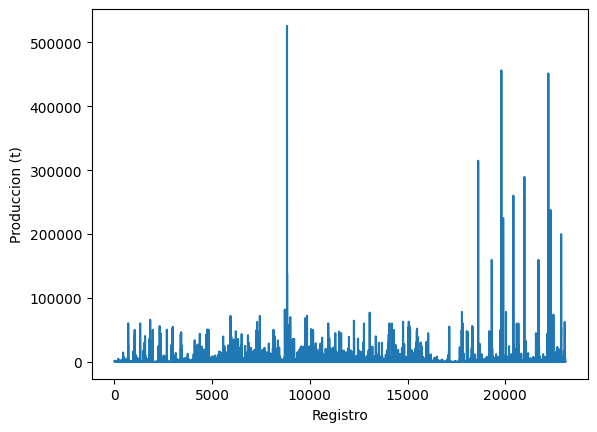

In [ ]:

# Seleccionar la columna que se desea graficar
columna = df_BoyacaMD['Produccion (t)']

# Graficar los datos
plt.plot(columna)

# Agregar etiquetas al eje x y al eje y
plt.xlabel('Registro')
plt.ylabel('Produccion (t)')

# Mostrar el gráfico
plt.show()

In [ ]:

regsAnomalos=df_BoyacaMD.loc[df_BoyacaMD['Produccion (t)']>500000]

print(regsAnomalos)

                      TIPO  MUNICIPIO          CULTIVO PERIODO  \
8832  CULTIVOS PERMANENTES  AQUITANIA  CEBOLLA DE RAMA    2012   

      Area Sembrada (ha)  Area Cosechada (ha)  Produccion (t)  
8832              1430.0                 1.43        525600.0  


In [ ]:
print(df_BoyacaMD.loc[8691])

TIPO                   CULTIVOS TRANSITORIOS SEMESTRE A
MUNICIPIO                                     EL ESPINO
CULTIVO                                            PAPA
PERIODO                                           2011A
Area Sembrada (ha)                                 10.0
Area Cosechada (ha)                                10.0
Produccion (t)                                     60.0
Name: 8691, dtype: object


## Acotamiento del problema

### Volver uniformes los registros categoricos solo minusculas (UDCLEAR)

In [ ]:
df_BoyacaMD_V1=df_BoyacaMD.copy()
# Convertir los valores de la columna 'CULTIVO' a mayusculas
df_BoyacaMD_V1['CULTIVO'] = df_BoyacaMD_V1['CULTIVO'].str.lower()

# Convertir los valores de la columna 'CULTIVO' a mayusculas
df_BoyacaMD_V1['MUNICIPIO'] = df_BoyacaMD_V1['MUNICIPIO'].str.lower()

# Convertir los valores de la columna 'CULTIVO' a mayusculas
df_BoyacaMD_V1['PERIODO'] = df_BoyacaMD_V1['PERIODO'].str.lower()


In [ ]:
pip install unidecode


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


Vamos a seleccionar papa y papa criolla para ello creamos otro dataframe

In [ ]:
#Dataframe acotado
df_BoyacaMD_V2= df_BoyacaMD_V1.copy()

# Definir los valores de la columna 'A' para filtrar los registros
valores_columna = ['papa', 'papa criolla']

##¿ Filtrar los registros que cumplen con los valores de la columna 'A'
df_BoyacaMD_V2 = df_BoyacaMD_V2[df_BoyacaMD_V2['CULTIVO']
                                     .isin(valores_columna)]


### Resetear los indices del dataframe

In [ ]:
# Restablecer los índices
df_BoyacaMD_V2 = df_BoyacaMD_V2.reset_index(drop=True)

In [ ]:
print(df_BoyacaMD_V2.head(3))

                               TIPO  MUNICIPIO CULTIVO PERIODO  \
0  CULTIVOS TRANSITORIOS SEMESTRE A    almeida    papa   2015a   
1  CULTIVOS TRANSITORIOS SEMESTRE A  aquitania    papa   2015a   
2  CULTIVOS TRANSITORIOS SEMESTRE A   arcabuco    papa   2015a   

   Area Sembrada (ha)  Area Cosechada (ha)  Produccion (t)  
0                 6.0                  6.0            40.8  
1               325.0                320.0          8000.0  
2              1200.0                700.0         14000.0  


### Eliminar espacios y tildes y actualizar valores

In [ ]:
from unidecode import unidecode

# Función para eliminar las tildes de un texto
def eliminar_tildes(texto):
    return unidecode(texto)

# Función para convertir los espacios en blanco en guiones
def convertir_espacios(texto):
    return texto.replace(" ", "-")

# Aplicar la función a la columna 'Texto' del DataFrame
df_BoyacaMD_V2['MUNICIPIO'] = df_BoyacaMD_V2['MUNICIPIO'].apply(eliminar_tildes)
# Aplicar la función a la columna 'Texto' del DataFrame
df_BoyacaMD_V2['MUNICIPIO'] = df_BoyacaMD_V2['MUNICIPIO'].apply(convertir_espacios)
df_BoyacaMD_V2['CULTIVO'] = df_BoyacaMD_V2['CULTIVO'].apply(convertir_espacios)

# Mostrar el DataFrame resultante
print(df_BoyacaMD_V2['MUNICIPIO'].loc[25])
print(df_BoyacaMD_V2['CULTIVO'].loc[96])

el-cocuy
papa-criolla


In [ ]:
# Obtener los valores únicos de la columna '
cultivos = df_BoyacaMD_V2['CULTIVO'].unique()
print(cultivos)

['papa' 'papa-criolla']


In [ ]:
print(df_BoyacaMD_V2.head(5))
print("Contiene ",len(df_BoyacaMD_V2), " registros")

                               TIPO  MUNICIPIO CULTIVO PERIODO  \
0  CULTIVOS TRANSITORIOS SEMESTRE A    almeida    papa   2015a   
1  CULTIVOS TRANSITORIOS SEMESTRE A  aquitania    papa   2015a   
2  CULTIVOS TRANSITORIOS SEMESTRE A   arcabuco    papa   2015a   
3  CULTIVOS TRANSITORIOS SEMESTRE A      belen    papa   2015a   
4  CULTIVOS TRANSITORIOS SEMESTRE A  beteitiva    papa   2015a   

   Area Sembrada (ha)  Area Cosechada (ha)  Produccion (t)  
0                 6.0                  6.0            40.8  
1               325.0                320.0          8000.0  
2              1200.0                700.0         14000.0  
3               961.0                900.0         16200.0  
4                16.0                 14.0           141.4  
Contiene  2573  registros


# 2.Deteccion de datos anomalos 

## Graficar produccion

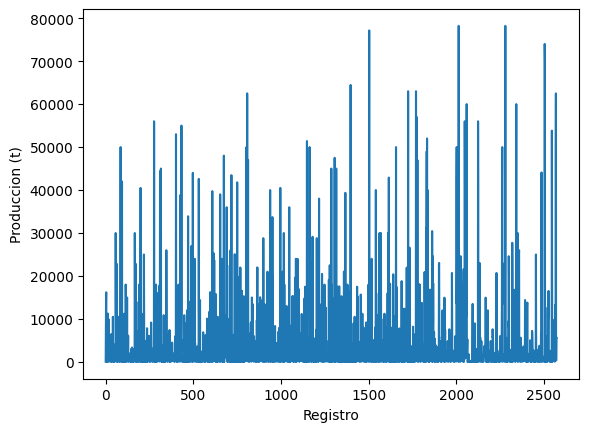

In [ ]:
# Seleccionar la columna que se desea graficar
columna = df_BoyacaMD_V2['Produccion (t)']

# Graficar los datos
plt.plot(columna)

# Agregar etiquetas al eje x y al eje y
plt.xlabel('Registro')
plt.ylabel('Produccion (t)')

# Mostrar el gráfico
plt.show()

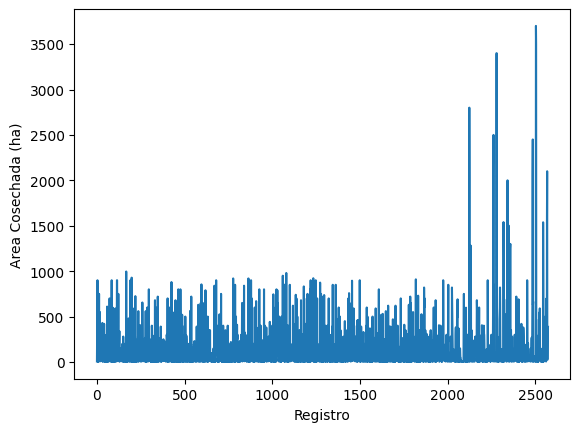

In [ ]:
# Seleccionar la columna que se desea graficar
columna = df_BoyacaMD_V2['Area Cosechada (ha)']

# Graficar los datos
plt.plot(columna)

# Agregar etiquetas al eje x y al eje y
plt.xlabel('Registro')
plt.ylabel('Area Cosechada (ha)')

# Mostrar el gráfico
plt.show()

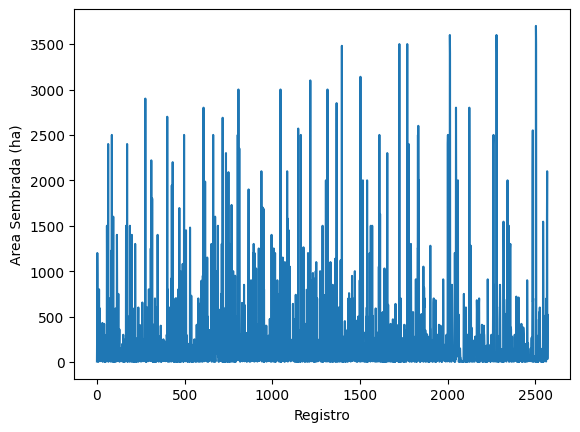

In [ ]:
# Seleccionar la columna que se desea graficar
columna = df_BoyacaMD_V2['Area Sembrada (ha)']

# Graficar los datos
plt.plot(columna)

# Agregar etiquetas al eje x y al eje y
plt.xlabel('Registro')
plt.ylabel('Area Sembrada (ha)')

# Mostrar el gráfico
plt.show()

In [ ]:
numero_dado = 2500
registros_mayor_5 = df_BoyacaMD_V2.loc[df_BoyacaMD_V2['Area Sembrada (ha)'] > numero_dado]

print(registros_mayor_5)

                                  TIPO     MUNICIPIO CULTIVO PERIODO  \
276   CULTIVOS TRANSITORIOS SEMESTRE A        saboya    papa   2018a   
401   CULTIVOS TRANSITORIOS SEMESTRE B        saboya    papa   2018b   
608   CULTIVOS TRANSITORIOS SEMESTRE A         tunja    papa   2012a   
717   CULTIVOS TRANSITORIOS SEMESTRE A     siachoque    papa   2011a   
807   CULTIVOS TRANSITORIOS SEMESTRE B  ventaquemada    papa   2013b   
1047  CULTIVOS TRANSITORIOS SEMESTRE A     siachoque    papa   2012a   
1148  CULTIVOS TRANSITORIOS SEMESTRE B         tunja    papa   2016b   
1217  CULTIVOS TRANSITORIOS SEMESTRE A        saboya    papa   2017a   
1315  CULTIVOS TRANSITORIOS SEMESTRE B     siachoque    papa   2013b   
1367  CULTIVOS TRANSITORIOS SEMESTRE A         tunja    papa   2011a   
1397  CULTIVOS TRANSITORIOS SEMESTRE A        samaca    papa   2011a   
1503  CULTIVOS TRANSITORIOS SEMESTRE B         tunja    papa   2011b   
1725  CULTIVOS TRANSITORIOS SEMESTRE A     siachoque    papa   2

## Determinación del umbral para Z-Score

In [ ]:
import pandas as pd
import numpy as np


# calcular la media y la desviación estándar de la columna 'columna_de_datos'
media = df_BoyacaMD_V2['Produccion (t)'].mean()
print("La media es: ", media)

desviacion_estandar = df_BoyacaMD_V2['Produccion (t)'].std()
print("La desviación estandar: ",desviacion_estandar )

# definir el umbral como una cierta cantidad de desviaciones estándar por encima de la media
umbral = (60000-media)/desviacion_estandar

# imprimir el umbral
print('El umbral de anormalidad es:', umbral)


La media es:  4141.671546832491
La desviación estandar:  9300.620419890289
El umbral de anormalidad es: 6.005871214108361


Implementación de Z-Score

In [ ]:
import pandas as pd
import statistics

# Seleccionar la columna de interés
col = 'Produccion (t)'
data = df_BoyacaMD_V2[col]

# Calcular el puntaje Z para cada punto de datos
mean = data.mean()
std = data.std()
threshold = umbral # Umbral de tolerancia
z_scores = [(x - mean) / std for x in data]

# Crear un dataframe para almacenar los registros anómalos
anomalies_df = pd.DataFrame(columns=df_BoyacaMD_V2.columns)

print("Esta es la media de los scores ", statistics.mean(z_scores))

# Iterar a través de cada registro y comprobar si contiene valores anómalos
for i, score in enumerate(z_scores):
    if abs(score) > threshold:
        anomalies_df = anomalies_df.append(df_BoyacaMD_V2.iloc[i])

# Imprimir los registros anómalos encontrados
print("Registros anómalos encontrados:")
print(anomalies_df)
print("Registros anomalos: ",len(anomalies_df))




Esta es la media de los scores  2.873371728021912e-17
Registros anómalos encontrados:
                                  TIPO     MUNICIPIO CULTIVO PERIODO  \
807   CULTIVOS TRANSITORIOS SEMESTRE B  ventaquemada    papa   2013b   
1397  CULTIVOS TRANSITORIOS SEMESTRE A        samaca    papa   2011a   
1503  CULTIVOS TRANSITORIOS SEMESTRE B         tunja    papa   2011b   
1725  CULTIVOS TRANSITORIOS SEMESTRE A     siachoque    papa   2019a   
1770  CULTIVOS TRANSITORIOS SEMESTRE B     siachoque    papa   2019b   
2013  CULTIVOS TRANSITORIOS SEMESTRE A     siachoque    papa   2019a   
2014  CULTIVOS TRANSITORIOS SEMESTRE B     siachoque    papa   2019b   
2279                       Transitorio     siachoque    papa   2020a   
2280                       Transitorio     siachoque    papa   2020b   
2504                       Transitorio     siachoque    papa   2021a   
2505                       Transitorio     siachoque    papa   2021b   
2568                       Transitorio  ventaquema

<ipython-input-253-008154907516>:22: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  anomalies_df = anomalies_df.append(df_BoyacaMD_V2.iloc[i])
<ipython-input-253-008154907516>:22: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  anomalies_df = anomalies_df.append(df_BoyacaMD_V2.iloc[i])
<ipython-input-253-008154907516>:22: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  anomalies_df = anomalies_df.append(df_BoyacaMD_V2.iloc[i])
<ipython-input-253-008154907516>:22: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  anomalies_df = anomalies_df.append(df_BoyacaMD_V2.iloc[i])
<ipython-input-253-008154907516>:22: FutureWarning: The frame.append method 

## Eliminar datos anomalos

In [ ]:
# Obtener los índices que deben eliminarse
ind_anomalos = anomalies_df.index

print("Cantidad de indices a eliminar: ",len(ind_anomalos))
#print(indices_a_eliminar)
# Eliminar los registros de df1 basándose en los índices
df_BoyacaMD_V2 = df_BoyacaMD_V2.drop(ind_anomalos)

Cantidad de indices a eliminar:  12


### Resetear indices

In [ ]:
# Restablecer los índices
df_BoyacaMD_V2 = df_BoyacaMD_V2.reset_index(drop=True)

### Grafica de produccion

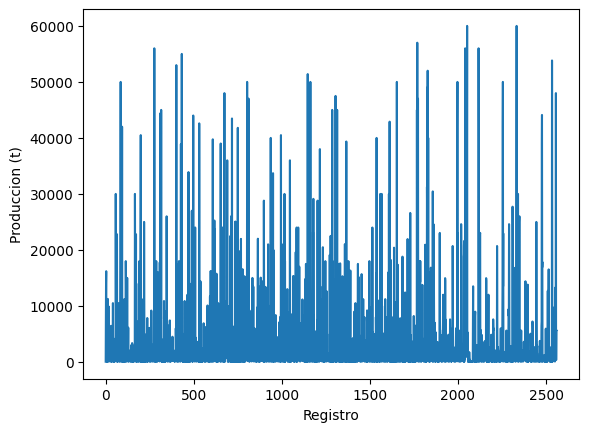

In [ ]:
# Seleccionar la columna que se desea graficar
columna = df_BoyacaMD_V2['Produccion (t)']

# Graficar los datos
plt.plot(columna)

# Agregar etiquetas al eje x y al eje y
plt.xlabel('Registro')
plt.ylabel('Produccion (t)')

# Mostrar el gráfico
plt.show()

Atributo área sembrada

In [ ]:
# calcular la media y la desviación estándar de la columna 'columna_de_datos'
media = df_BoyacaMD['Area Sembrada (ha)'].mean()
print("La media es: ", media)

desviacion_estandar = df_BoyacaMD['Area Sembrada (ha)'].std()
print("La desviación estandar: ",desviacion_estandar )

# definir el umbral como una cierta cantidad de desviaciones estándar por encima de la media
umbral = media + (3 * desviacion_estandar)

# imprimir el umbral
print('El umbral de anormalidad es:', umbral)

# Seleccionar la columna de interés
col = 'Area Sembrada (ha)'
data = df_BoyacaMD[col]

# Calcular el puntaje Z para cada punto de datos
mean = data.mean()
std = data.std()
threshold = umbral # Umbral de tolerancia
z_scores = [(x - mean) / std for x in data]

# Crear un dataframe para almacenar los registros anómalos
anomalies_df = pd.DataFrame(columns=df_BoyacaMD.columns)

print("Esta es la media de los scores ", statistics.mean(z_scores))

# Iterar a través de cada registro y comprobar si contiene valores anómalos
for i, score in enumerate(z_scores):
    if abs(score) > threshold:
        anomalies_df = anomalies_df.append(df_BoyacaMD.iloc[i])

# Imprimir los registros anómalos encontrados
print("Registros anómalos encontrados:")
print(anomalies_df)



La media es:  78.56543776558074
La desviación estandar:  287.47123548726336
El umbral de anormalidad es: 940.9791442273709
Esta es la media de los scores  -9.04594834837137e-18
Registros anómalos encontrados:
Empty DataFrame
Columns: [TIPO, MUNICIPIO, CULTIVO, PERIODO, Area Sembrada (ha), Area Cosechada (ha), Produccion (t)]
Index: []


# 3.Seleccion de atributos

## Algoritmo Random Forest 

In [ ]:
import pandas as pd
from sklearn.feature_selection import mutual_info_classif
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_selection import SelectKBest

# Cargar el conjunto de datos
data_atributte_selection = df_BoyacaMD_V2.copy()

# Definir la columna target
target_column = "Produccion (t)" 
target = data_atributte_selection[target_column].astype('int64')

# Separar los atributos numéricos y categóricos
numeric_features = data_atributte_selection.select_dtypes(include=['float64', 'int64']).columns
categorical_features = data_atributte_selection.select_dtypes(include=['object']).columns

# Codificar los atributos categóricos
label_encoder = LabelEncoder()
for col in categorical_features:
    data_atributte_selection[col] = label_encoder.fit_transform(data_atributte_selection[col].astype(str))

# Escalar los atributos numéricos
scaler = StandardScaler()
data_atributte_selection[numeric_features] = scaler.fit_transform(data_atributte_selection[numeric_features])

# Calcular la importancia de los atributos utilizando la información mutua
selector = SelectKBest(mutual_info_classif, k=7)
selector.fit(data_atributte_selection, target)

# Obtener los índices de los atributos seleccionados
selected_indices = selector.get_support(indices=True)

# Obtener los nombres de los atributos seleccionados
selected_features = data_atributte_selection.columns[selected_indices]

# Crear un nuevo conjunto de datos con los atributos seleccionados
data_selected = data_atributte_selection[selected_features]
# print(data_selected)

# Calcular la importancia de los atributos utilizando la información mutua
scores = mutual_info_classif(data_atributte_selection, target)
feature_scores = list(zip(data_atributte_selection.columns, scores))

# Ordenar los atributos por relevancia de manera descendente
feature_scores_sorted = sorted(feature_scores, key=lambda x: x[1], reverse=True)

# Obtener los nombres de los atributos seleccionados
selected_features = [x[0] for x in feature_scores_sorted[:8]]

# Crear un nuevo conjunto de datos con los atributos seleccionados
data_selected = data_atributte_selection[selected_features]

# Imprimir los nombres de los atributos seleccionados en orden descendente junto con su relevancia
for feature, score in feature_scores_sorted:
    if feature in selected_features:
        print(feature, score)

print(selected_features)

Produccion (t) 5.858545419570188
Area Cosechada (ha) 2.9537885964058677
Area Sembrada (ha) 2.560177739252252
MUNICIPIO 1.22732418066615
PERIODO 0.13824744461165306
TIPO 0.12157897373722548
CULTIVO 0.11314904922191804
['Produccion (t)', 'Area Cosechada (ha)', 'Area Sembrada (ha)', 'MUNICIPIO', 'PERIODO', 'TIPO', 'CULTIVO']


## Elimando la columna del atributo menos relevante

In [ ]:
df_BoyacaMD_V3=df_BoyacaMD_V2.copy()

In [ ]:
df_BoyacaMD_V3.drop('TIPO', axis=1, inplace=True)
print(df_BoyacaMD_V3.head(10))

    MUNICIPIO CULTIVO PERIODO  Area Sembrada (ha)  Area Cosechada (ha)  \
0     almeida    papa   2015a                 6.0                  6.0   
1   aquitania    papa   2015a               325.0                320.0   
2    arcabuco    papa   2015a              1200.0                700.0   
3       belen    papa   2015a               961.0                900.0   
4   beteitiva    papa   2015a                16.0                 14.0   
5      boyaca    papa   2015a               250.0                250.0   
6  buenavista    papa   2015a                26.0                 10.0   
7    busbanza    papa   2015a                 4.2                  1.8   
8      caldas    papa   2015a                90.0                 60.0   
9     cerinza    papa   2015a                 8.0                  6.0   

   Produccion (t)  
0           40.80  
1         8000.00  
2        14000.00  
3        16200.00  
4          141.40  
5         6250.00  
6          130.00  
7           18.54  
8    

# 4.Transformacion de datos

In [ ]:
#Exportar CSV
df_BoyacaMD_V3.to_csv('df_BoyacaMD_V3.csv',index=False)


Obtener las clases para los atributos categóricos

In [ ]:

municipios=df_BoyacaMD_V3['MUNICIPIO'].unique()
periodos=df_BoyacaMD_V3['PERIODO'].unique()
cultivos = df_BoyacaMD_V3['CULTIVO'].unique()

#
print(list(municipios))
print(list(cultivos))
print(list(periodos))

['almeida', 'aquitania', 'arcabuco', 'belen', 'beteitiva', 'boyaca', 'buenavista', 'busbanza', 'caldas', 'cerinza', 'chinavita', 'chiquinquira', 'chiquiza', 'chiscas', 'chita', 'chivata', 'cienega', 'combita', 'corrales', 'cucaita', 'cuitiva', 'duitama', 'el-cocuy', 'firavitoba', 'floresta', 'gachantiva', 'gameza', 'garagoa', 'guacamayas', 'guican', 'iza', 'jenesano', 'jerico', 'la-uvita', 'mongua', 'mongui', 'motavita', 'nobsa', 'nuevo-colon', 'oicata', 'pachavita', 'paipa', 'pajarito', 'panqueba', 'paz-de-rio', 'pesca', 'ramiriqui', 'raquira', 'rondon', 'saboya', 'samaca', 'san-miguel-de-sema', 'santa-rosa-de-viterbo', 'santa-sofia', 'sativanorte', 'sativasur', 'siachoque', 'soata', 'socha', 'socota', 'sogamoso', 'somondoco', 'sora', 'soraca', 'sotaquira', 'susacon', 'sutamarchan', 'tasco', 'tibana', 'tibasosa', 'tinjaca', 'tipacoque', 'toca', 'topaga', 'tota', 'tunja', 'turmeque', 'tuta', 'tutaza', 'umbita', 'ventaquemada', 'villa-de-leyva', 'viracacha', 'chivor', 'labranzagrande', 

### Discretizar datos

Por medio de UD Clear se discretizaron los datos

# 5.Mineria de datos

## Red neuronal de clasificación

In [1]:
import pandas as pd
import numpy as np
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder

# Cargar el dataframe
df_BoyacaMD_V4 = pd.read_csv('df_BoyacaMD_V4.csv')

# Obtener las características y las etiquetas
features = df_BoyacaMD_V4.drop("Produccion (t)", axis=1)
labels = df_BoyacaMD_V4["Produccion (t)"]
labels_df = pd.DataFrame(df_BoyacaMD_V4['Produccion (t)'])

# Convertir las características categóricas en variables numéricas
label_encoder = LabelEncoder()
onehot_encoder = OneHotEncoder(sparse=False)

features_encoded = features.apply(label_encoder.fit_transform)

class_encoded_1 = label_encoder.fit_transform(labels)
class_encoded_2 = class_encoded_1.reshape(-1, 1)
class_encoded_3 = onehot_encoder.fit_transform(class_encoded_2)



# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(features_encoded, class_encoded_3, test_size=0.2, random_state=42)

# Crear el modelo de red neuronal
model = tf.keras.models.Sequential([
    tf.keras.layers.Dense(50, activation='relu', input_shape=(X_train.shape[1],)),
    tf.keras.layers.Dense(50, activation='relu'),
    tf.keras.layers.Dense(class_encoded_3.shape[1], activation='softmax')
])

# Compilar el modelo
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Entrenar el modelo
model.fit(X_train, y_train, epochs=250, batch_size=32, validation_data=(X_test, y_test))

# Evaluar el modelo en los datos de prueba
loss, accuracy = model.evaluate(X_test, y_test)
print("Loss: {:.4f}".format(loss))
print("Accuracy: {:.2f}%".format(accuracy * 100))



/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


Epoch 1/250
64/64 [==============================] - 3s 17ms/step - loss: 1.6518 - accuracy: 0.7666 - val_loss: 1.0063 - val_accuracy: 0.8538
Epoch 2/250
64/64 [==============================] - 0s 4ms/step - loss: 0.6241 - accuracy: 0.8726 - val_loss: 0.7445 - val_accuracy: 0.8635
Epoch 3/250
64/64 [==============================] - 0s 5ms/step - loss: 0.5439 - accuracy: 0.8760 - val_loss: 0.6223 - val_accuracy: 0.8616
Epoch 4/250
64/64 [==============================] - 0s 5ms/step - loss: 0.5156 - accuracy: 0.8755 - val_loss: 0.6287 - val_accuracy: 0.8577
Epoch 5/250
64/64 [==============================] - 0s 5ms/step - loss: 0.4771 - accuracy: 0.8818 - val_loss: 0.5726 - val_accuracy: 0.8635
Epoch 6/250
64/64 [==============================] - 1s 8ms/step - loss: 0.4610 - accuracy: 0.8828 - val_loss: 0.5489 - val_accuracy: 0.8635
Epoch 7/250
64/64 [==============================] - 1s 9ms/step - loss: 0.4354 - accuracy: 0.8833 - val_loss: 0.5311 - val_accuracy: 0.8596
Epoch 8/250


### Error cuadrático medio de la red neuronal

In [2]:
from sklearn.metrics import mean_squared_error
# Realizar predicciones en los datos de prueba
y_pred = model.predict(X_test)
# Calcular el error cuadrático medio
mse = mean_squared_error(y_test, y_pred)

print("Mean Squared Error: {:.4f}".format(mse))

17/17 [==============================] - 0s 1ms/step
Mean Squared Error: 0.0156


### Función para decodificar

In [3]:
print("class_encoded_1: \n", len(class_encoded_1))

class_encoded_1: 
 2561


### Codigos de las categorias

In [3]:
#Codificación de municipio
cod_muni=features_encoded["MUNICIPIO"].unique()
cod_muni = cod_muni.tolist()
print("cod_muni: ",cod_muni)

#Codificación de cultivo
cod_culti=features_encoded["CULTIVO"].unique()
cod_culti = cod_culti.tolist()
print("cod_culti: ",cod_culti)

#Codificación de periodo
cod_perio=features_encoded["PERIODO"].unique()
cod_perio = cod_perio.tolist()
print("cod_perio: ",cod_perio)

#Codificación de area sembrada
cod_a_sem=features_encoded["Area Sembrada (ha)"].unique()
cod_a_sem = cod_a_sem.tolist()
print("cod_a_sem: ",cod_a_sem)

#Codificación de area cosechada
cod_a_cose=features_encoded["Area Cosechada (ha)"].unique()
cod_a_cose = cod_a_cose.tolist()
print("cod_a_cose: ",cod_a_cose)

#Codificación de produccion fase 1

# Eliminar duplicados sin ordenar
valores_unicos, indices = np.unique(class_encoded_1, return_index=True)
cod_pro = class_encoded_1[sorted(indices)]
print("cod_pro: ",cod_pro)

#Codificación de produccion fase 2
valores_unicos, indices = np.unique(class_encoded_2, return_index=True)
cod_pro_2 = class_encoded_2[sorted(indices)]
print("cod_pro_2: ",cod_pro_2)

#Codificación de produccion fase 3
filas_unicas, indices = np.unique(class_encoded_3, axis=0, return_index=True)
cod_pro_3 = class_encoded_3[sorted(indices)]
print("cod_pro_3: ",cod_pro_3)


cod_muni:  [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 17, 18, 19, 20, 21, 22, 23, 25, 26, 27, 28, 29, 30, 32, 33, 34, 35, 36, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 52, 53, 55, 56, 57, 58, 59, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 84, 85, 86, 87, 88, 89, 90, 91, 93, 94, 16, 37, 40, 24, 38, 51, 60, 31, 54, 92, 39, 83]
cod_culti:  [0, 1]
cod_perio:  [8, 9, 14, 15, 13, 2, 0, 7, 11, 12, 4, 6, 1, 3, 10, 5, 16, 17, 18, 19, 20, 21]
cod_a_sem:  [0, 7, 9, 8, 1, 4, 5, 2, 6, 3]
cod_a_cose:  [0, 6, 7, 8, 5, 3, 1, 4, 2]
cod_pro:  [0 9 1 3 2 7 5 8 6 4]
cod_pro_2:  [[0]
 [9]
 [1]
 [3]
 [2]
 [7]
 [5]
 [8]
 [6]
 [4]]
cod_pro_3:  [[1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 

### Categorias de las columnas

In [4]:
#DeCodificación de municipio
cate_muni=df_BoyacaMD_V4["MUNICIPIO"].unique()
cate_muni= cate_muni.tolist()
print("cate_muni: ",cate_muni)

#DECodificación de cultivo
cate_culti=df_BoyacaMD_V4["CULTIVO"].unique()
cate_culti= cate_culti.tolist()
print("cate_culti: ",cate_culti)

#DeCodificación de periodo
cate_perio=df_BoyacaMD_V4["PERIODO"].unique()
cate_perio= cate_perio.tolist()
print("cate_perio: ",cate_perio)

#DECodificación de area sembrada
cate_a_sem=df_BoyacaMD_V4["Area Sembrada (ha)"].unique()
cate_a_sem= cate_a_sem.tolist()
print("cate_a_sem: ",cate_a_sem)

#DECodificación de area cosechada
cate_a_cose=df_BoyacaMD_V4["Area Cosechada (ha)"].unique()
cate_a_cose= cate_a_cose.tolist()
print("cate_a_cose: ",cate_a_cose)

#Decodificación de producción
cate_pro=df_BoyacaMD_V4["Produccion (t)"].unique()
cate_pro= cate_pro.tolist()
print("cate_pro: ",cate_pro)



cate_muni:  ['almeida', 'aquitania', 'arcabuco', 'belen', 'beteitiva', 'boyaca', 'buenavista', 'busbanza', 'caldas', 'cerinza', 'chinavita', 'chiquinquira', 'chiquiza', 'chiscas', 'chita', 'chivata', 'cienega', 'combita', 'corrales', 'cucaita', 'cuitiva', 'duitama', 'el-cocuy', 'firavitoba', 'floresta', 'gachantiva', 'gameza', 'garagoa', 'guacamayas', 'guican', 'iza', 'jenesano', 'jerico', 'la-uvita', 'mongua', 'mongui', 'motavita', 'nobsa', 'nuevo-colon', 'oicata', 'pachavita', 'paipa', 'pajarito', 'panqueba', 'paz-de-rio', 'pesca', 'ramiriqui', 'raquira', 'rondon', 'saboya', 'samaca', 'san-miguel-de-sema', 'santa-rosa-de-viterbo', 'santa-sofia', 'sativanorte', 'sativasur', 'siachoque', 'soata', 'socha', 'socota', 'sogamoso', 'somondoco', 'sora', 'soraca', 'sotaquira', 'susacon', 'sutamarchan', 'tasco', 'tibana', 'tibasosa', 'tinjaca', 'tipacoque', 'toca', 'topaga', 'tota', 'tunja', 'turmeque', 'tuta', 'tutaza', 'umbita', 'ventaquemada', 'villa-de-leyva', 'viracacha', 'chivor', 'labra

In [6]:
print(cod_muni[23])

25


### Función de transformación de entradas

In [5]:
#Función para municipio
def transformMuni(muni_data):
  i_muni = cate_muni.index(muni_data)
  o_muni=cod_muni[i_muni]
  return o_muni

#Función para cultivo
def transformCulti(culti_data):
  i_culti = cate_culti.index(culti_data)
  o_culti=cod_culti[i_culti]
  return o_culti

#Función para periodo
def transformPerio(perio_data):
  i_perio = cate_perio.index(perio_data)
  o_perio=cod_perio[i_perio]
  return o_perio

#Función para area sembrada
def transformArea_sem(area_sem_data):
  i_area_sem = cate_a_sem.index(area_sem_data)
  o_area_sem=cod_a_sem[i_area_sem]
  return o_area_sem

#Función para area cosechada
def transformArea_cose(area_cose_data):
  i_area_cose = cate_a_cose.index(area_cose_data)
  o_area_cose=cod_a_cose[i_area_cose]
  return o_area_cose


### Función para transformar los datos dados una lista


In [6]:
def transformData(data):
  muni=data[0]
  culti=data[1]
  perio=data[2]
  area_sem=data[3]
  area_cose=data[4]
  i_muni = cate_muni.index(muni)
  i_culti = cate_culti.index(culti)
  i_perio = cate_perio.index(perio)
  i_area_sem = cate_a_sem.index(area_sem)
  i_area_cose = area_cose.index(area_cose)

  o_muni=cod_muni[i_muni]
  o_culti=cod_culti[i_culti]
  o_perio=cod_perio[i_perio]
  o_area_sem=cod_a_sem[i_area_sem]
  o_area_cose=cod_a_cose[i_area_cose]

  outputCodificado = [o_muni,o_culti,o_perio,o_area_sem, o_area_cose]

  return outputCodificado



In [7]:
dataTest=transformData(['almeida', 'papa', '2015a', '[1.0-310.9]', '[0.8-280.71997]'])
print(dataTest)

[0, 0, 8, 0, 0]


### Prueba de predicción

Es necesario convertir los datos de prueba un DATAFRAME

In [8]:
df_dataTest = pd.DataFrame(columns=['MUNICIPIO', 'CULTIVO', 'PERIODO', 'Area Sembrada (ha)','Area Cosechada (ha)'])
df_dataTest.loc[len(df_dataTest)] = dataTest

In [9]:
# Realizar predicciones con el modelo
predictions = model.predict(df_dataTest)
#print("predictions: ",predictions)

# Obtener las etiquetas predichas
predicted_labels = np.argmax(predictions, axis=1)
#print("predicted_labels: ",predicted_labels)

# Decodificar las etiquetas predichas
decoded_labels = label_encoder.inverse_transform(predicted_labels)

# Imprimir las etiquetas predichas
print("Etiquetas predichas:", decoded_labels)

#dataframe para predicciones
df_dataPredi = df_dataTest.copy()

#Crear columna producción
df_dataPredi['Produccion (t)']=0

#Guarda las predicciones en el nuevo data frame
df_dataPredi['Produccion (t)']= decoded_labels.tolist()

1/1 [==============================] - 0s 20ms/step
Etiquetas predichas: ['[0.5-6000.45]']


## Realización de pruebas

### Preparar dataframe de datos para la prediccion

In [95]:
"""
#Crear dataframe con datos sin codificar
dataReal_df = pd.DataFrame(columns=['MUNICIPIO', 'CULTIVO', 'PERIODO', 'Area Sembrada (ha)','Area Cosechada (ha)'])

#Insertar varios registros para probar
dataReal_df.loc[len(dataReal_df)] = ['almeida', 'papa', '2015a', '[1.0-310.9]', '[0.8-280.71997]']
dataReal_df.loc[len(dataReal_df)] = ['aquitania','papa','2015a','[310.9-620.8]','[280.71997-560.63995]']
dataReal_df.loc[len(dataReal_df)] = ['arcabuco','papa','2015a','[930.69995-1240.6]','[560.63995-840.55994]']
"""
#Se toma el dataframe discretizado y se crea una copia
dataRealTotal_df=df_BoyacaMD_V4.copy()

#Se escoje la mitad de los datos de forma aleatoria
dataReal_df_pro = dataRealTotal_df.sample(frac=0.5, random_state=98)
dataReal_df_pro= dataReal_df_pro.reset_index(drop=True)
#Eliminar columna produccion
dataReal_df=dataReal_df_pro.drop('Produccion (t)', axis=1)
#Resetear los índices, y quitar los anteriores drop = true
dataReal_df= dataReal_df.reset_index(drop=True)

#listDataReal.append(dataReal_df)

#Crear copia del dataframe original
dataCoded_df = dataReal_df.copy()
#Resetear los índices, y quitar los anteriores drop = true
dataCoded_df= dataCoded_df.reset_index(drop=True)


# Aplicar la función a la columna 'MUNICIPIO'
dataCoded_df['MUNICIPIO'] = dataCoded_df['MUNICIPIO'].apply(transformMuni)
# Aplicar la función a la columna 'CULTIVO'
dataCoded_df['CULTIVO'] = dataCoded_df['CULTIVO'].apply(transformCulti)
# Aplicar la función a la columna 'PERIODO'
dataCoded_df['PERIODO'] = dataCoded_df['PERIODO'].apply(transformPerio)
# Aplicar la función a la columna 'Area Sembrada (ha)'
dataCoded_df['Area Sembrada (ha)'] = dataCoded_df['Area Sembrada (ha)'].apply(transformArea_sem)
# Aplicar la función a la columna 'Area Cosechada (ha)'
dataCoded_df['Area Cosechada (ha)'] = dataCoded_df['Area Cosechada (ha)'].apply(transformArea_cose)

### Prediccion a partit de DataFrame

In [96]:
# Realizar predicciones con el modelo
predictions_df = model.predict(dataCoded_df)
#print("predictions: ",predictions)

# Obtener las etiquetas predichas
predicted_labels_df = np.argmax(predictions_df, axis=1)
#print("predicted_labels: ",predicted_labels)

# Decodificar las etiquetas predichas
decoded_labels_df = label_encoder.inverse_transform(predicted_labels_df)

# Imprimir las etiquetas predichas
print("Etiquetas predichas:", decoded_labels_df)

#dataframe para guardar las predicciones
df_dataRealPredi = dataReal_df.copy()

#Crear columna producción
df_dataRealPredi['Produccion (t)']=0

#Guarda las predicciones en el nuevo data frame
df_dataRealPredi['Produccion (t)']= decoded_labels_df.tolist()

40/40 [==============================] - 0s 1ms/step
Etiquetas predichas: ['[0.5-6000.45]' '[0.5-6000.45]' '[0.5-6000.45]' ... '[0.5-6000.45]'
 '[6000.45-12000.4]' '[0.5-6000.45]']


### Grafica de la real y la prediccion

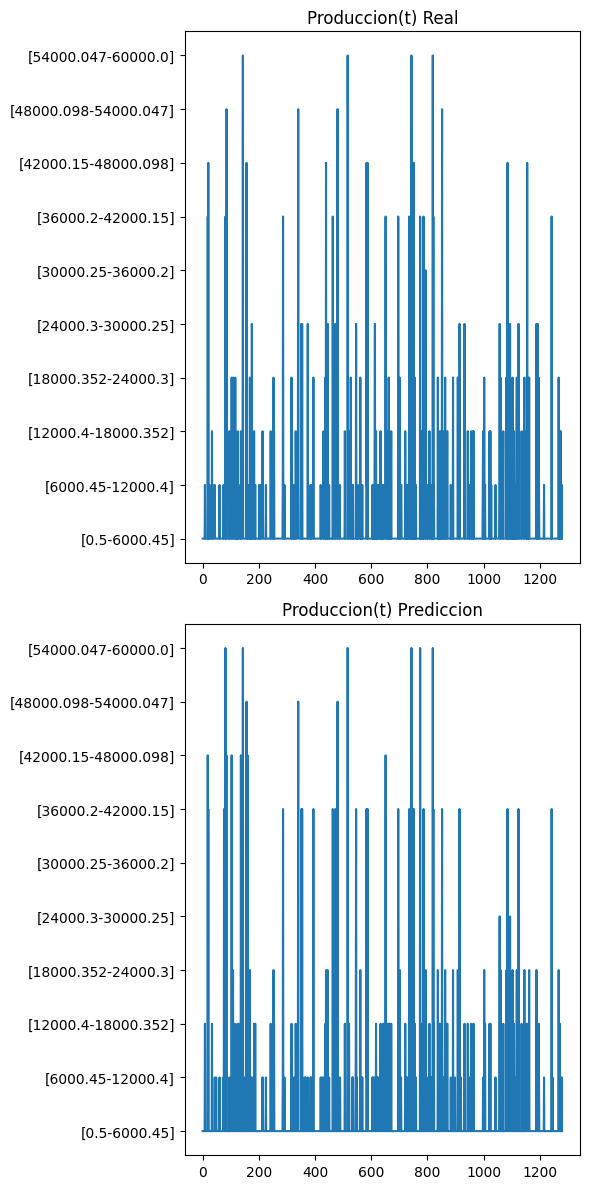

In [97]:
import matplotlib.pyplot as plt

# Definir el orden deseado
orden_deseado = ['[0.5-6000.45]', '[6000.45-12000.4]', '[12000.4-18000.352]', '[18000.352-24000.3]',
                '[24000.3-30000.25]', '[30000.25-36000.2]', '[36000.2-42000.15]', '[42000.15-48000.098]',
                '[48000.098-54000.047]', '[54000.047-60000.0]']

# Obtener los índices correspondientes al orden deseado para cada columna
indices_columna1 = [orden_deseado.index(valor) for valor in dataReal_df_pro['Produccion (t)']]
indices_columna2 = [orden_deseado.index(valor) for valor in df_dataRealPredi['Produccion (t)']]

# Crear una figura con dos subplots
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(6, 12))

# Graficar la primera columna en el primer subplot
ax1.plot(indices_columna1)
ax1.set_yticks(range(len(orden_deseado)))
ax1.set_yticklabels(orden_deseado)
ax1.set_title('Produccion(t) Real')

# Graficar la segunda columna en el segundo subplot
ax2.plot(indices_columna2)
ax2.set_yticks(range(len(orden_deseado)))
ax2.set_yticklabels(orden_deseado)
ax2.set_title('Produccion(t) Prediccion')

# Ajustar los subplots para evitar superposición de etiquetas
fig.tight_layout()

# Mostrar la figura con los subplots
plt.show()


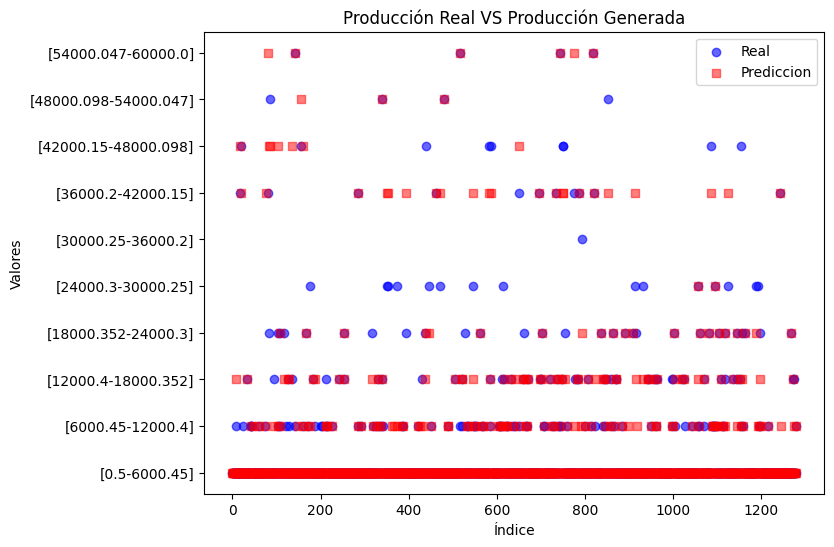

In [98]:
import matplotlib.pyplot as plt

# Definir el orden deseado
orden_deseado = ['[0.5-6000.45]', '[6000.45-12000.4]', '[12000.4-18000.352]', '[18000.352-24000.3]',
                '[24000.3-30000.25]', '[30000.25-36000.2]', '[36000.2-42000.15]', '[42000.15-48000.098]',
                '[48000.098-54000.047]', '[54000.047-60000.0]']

# Obtener los índices correspondientes al orden deseado para cada columna
indices_columna1 = [orden_deseado.index(valor) for valor in dataReal_df_pro['Produccion (t)']]
indices_columna2 = [orden_deseado.index(valor) for valor in df_dataRealPredi['Produccion (t)']]

# Crear una figura
fig, ax = plt.subplots(figsize=(8, 6))

# Graficar la primera columna
scatter1 = ax.scatter(range(len(indices_columna1)), indices_columna1, c='blue', marker='o',alpha=0.6, label='Real')

# Graficar la segunda columna
scatter2 = ax.scatter(range(len(indices_columna2)), indices_columna2, c='red', marker='s',alpha=0.5, label='Prediccion')

# Configurar las etiquetas del eje y
ax.set_yticks(range(len(orden_deseado)))
ax.set_yticklabels(orden_deseado)

# Configurar los títulos y leyendas
ax.set_title('Producción Real VS Producción Generada')
ax.set_xlabel('Índice')
ax.set_ylabel('Valores')
ax.legend()

# Mostrar la gráfica
plt.show()


In [99]:
################
import pandas as pd

# Supongamos que tienes dos dataframes: df1 y df2
# Y quieres comparar las columnas 'Columna1' de df1 y 'Columna2' de df2

# Obtener las columnas a comparar
columna1 = dataReal_df_pro['Produccion (t)']
columna2 = df_dataRealPredi['Produccion (t)']

# Obtener el número total de registros
total_registros = len(columna1)

# Comparar los registros índice por índice
registros_coincidentes = sum(columna1 == columna2)

# Calcular el porcentaje de precisión
porcentaje_precisión = (registros_coincidentes / total_registros) * 100

# Imprimir el porcentaje de precisión
print(f"Porcentaje de precisión: {porcentaje_precisión}%")


Porcentaje de precisión: 92.34375%


In [102]:
listaPrecision = [92.890625,93.359375,92.578125,93.4375,92.5,93.203125,92.34375]

promedio = sum(listaPrecision) / len(listaPrecision)

print("El promedio es:", promedio)


El promedio es: 92.90178571428571


## Prueba con regresión lineal

In [71]:
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

# Seleccionar las columnas numéricas y categóricas para el modelo de predicción
columnas_numericas = ['Area Sembrada (ha)', 'Area Cosechada (ha)', 'Produccion (t)']
columnas_categoricas = ['MUNICIPIO', 'CULTIVO','PERIODO']

# Codificar las variables categóricas usando OneHotEncoder
encoder = OneHotEncoder(sparse_output=False)
encoded_categorical = encoder.fit_transform(df_BoyacaMD_V4[columnas_categoricas])

# Crear un nuevo DataFrame con las variables codificadas y las variables numéricas
df_encoded = pd.concat([df_BoyacaMD_V4[columnas_numericas], 
                        pd.DataFrame(encoded_categorical)], axis=1)

# Definir la columna objetivo a predecir
objetivo = 'Produccion (t)'

# Dividir el DataFrame en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(df_encoded.drop(objetivo, axis=1), 
                                                    df_encoded[objetivo], test_size=0.2)
#Conversion a string
X_train.columns = X_train.columns.astype(str)

# Entrenar el modelo de Regresión Lineal
modelo = LinearRegression()
modelo.fit(X_train, y_train)

#Conversion a string
X_test.columns = X_test.columns.astype(str)

# Realizar predicciones en el conjunto de prueba
predicciones = modelo.predict(X_test)

# Calcular el error cuadrático medio (MSE) en las predicciones
mse = mean_squared_error(y_test, predicciones)
print("Error cuadrático medio (MSE):", mse)


ValueError: ignored

In [ ]:
#print(predicciones)
# Graficar los datos
plt.plot(predicciones)

# Agregar etiquetas al eje x y al eje y
plt.xlabel('Registro')
plt.ylabel('Produccion (t) Prediccion')

# Mostrar el gráfico
plt.show()


In [ ]:
# Seleccionar la columna que se desea graficar
columna = df_BoyacaMD_V4['Produccion (t)']

# Graficar los datos
plt.plot(columna)

# Agregar etiquetas al eje x y al eje y
plt.xlabel('Registro')
plt.ylabel('Produccion (t)')

# Mostrar el gráfico
plt.show()

## Regresión Ridge

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Ridge
from sklearn.preprocessing import OneHotEncoder

# Paso 1: Preparar tus datos
X = df_BoyacaMD_V4[['MUNICIPIO', 'CULTIVO', 'PERIODO', 'Area Sembrada (ha)', 'Area Cosechada (ha)']]
y = df_BoyacaMD_V4['Produccion (t)']

# Paso 2: Codificar las variables categóricas
encoder = OneHotEncoder()
X_encoded = encoder.fit_transform(X)

# Paso 3: Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.2, random_state=42)

# Paso 4: Importar y ajustar el modelo de regresión Ridge
ridge = Ridge(alpha=1)  # Configura el valor de alpha según tus necesidades
ridge.fit(X_train, y_train)

# Paso 5: Realizar predicciones
y_pred = ridge.predict(X_test)

# Calcular el error cuadrático medio (MSE) en las predicciones
mse = mean_squared_error(y_test, y_pred)
print("Error cuadrático medio (MSE):", mse)


## Random Forest

In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import OneHotEncoder

# Paso 1: Preparar tus datos
y = df_BoyacaMD_V4['Produccion (t)']

#Paso 2: codificar datos categóricos
# Crear un nuevo dataframe solo con las columnas categóricas
categorical_cols = ['MUNICIPIO', 'CULTIVO', 'PERIODO']
X_categorical = df_BoyacaMD_V4[categorical_cols]

# Crear una instancia de OneHotEncoder
encoder = OneHotEncoder(sparse=False)
# Ajustar y transformar los datos categóricos
X_encoded = encoder.fit_transform(X_categorical)
# Crear un dataframe a partir de los datos codificados
X_encoded_df = pd.DataFrame(X_encoded, columns=encoder.get_feature_names_out(categorical_cols))
# Concatenar el dataframe codificado con las columnas numéricas
X = pd.concat([X_encoded_df, df_BoyacaMD_V4[['Area Sembrada (ha)', 'Area Cosechada (ha)']]], axis=1)


# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Crear y entrenar el modelo de Random Forest
model = RandomForestRegressor(n_estimators=500, random_state=42)
model.fit(X_train, y_train)

# Realizar la predicción en el conjunto de prueba
y_pred = model.predict(X_test)

# Evaluar el rendimiento del modelo
mse = mean_squared_error(y_test, y_pred)
print("Error cuadrático medio (MSE):", mse)



In [ ]:
# Seleccionar la columna que se desea graficar
columna = df_BoyacaMD_V4['Produccion (t)']

# Graficar los datos
plt.plot(columna)

# Agregar etiquetas al eje x y al eje y
plt.xlabel('Registro')
plt.ylabel('Produccion (t)')

# Mostrar el gráfico
plt.show()


In [ ]:
# Graficar los datos
plt.plot(y_pred)

# Agregar etiquetas al eje x y al eje y
plt.xlabel('Registro')
plt.ylabel('Produccion (t) Prediccion')

# Mostrar el gráfico
plt.show()

## Gradient Boosting

In [ ]:
import pandas as pd
from sklearn.preprocessing import OneHotEncoder
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

# Crear un nuevo dataframe solo con las columnas categóricas
categorical_cols = ['MUNICIPIO', 'CULTIVO', 'PERIODO']
X_categorical = df_BoyacaMD_V4[categorical_cols]

# Crear una instancia de OneHotEncoder
encoder = OneHotEncoder(sparse=False)

# Ajustar y transformar los datos categóricos
X_encoded = encoder.fit_transform(X_categorical)

# Crear un dataframe a partir de los datos codificados
X_encoded_df = pd.DataFrame(X_encoded, columns=encoder.get_feature_names_out(categorical_cols))

# Concatenar el dataframe codificado con las columnas numéricas
X = pd.concat([X_encoded_df, df_BoyacaMD_V4[['Area Sembrada (ha)', 'Area Cosechada (ha)']]], axis=1)

# Definir el target o variable a predecir
y = df_BoyacaMD_V4['Produccion (t)']

# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Crear y entrenar el modelo de Gradient Boosting
model = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, random_state=42)
model.fit(X_train, y_train)

# Realizar la predicción en el conjunto de prueba
y_pred = model.predict(X_test)

# Evaluar el rendimiento del modelo
mse = mean_squared_error(y_test, y_pred)
print("Error cuadrático medio (MSE):", mse)


In [ ]:
# Graficar los datos
plt.plot(y_pred)

# Agregar etiquetas al eje x y al eje y
plt.xlabel('Registro')
plt.ylabel('Produccion (t) Prediccion')

# Mostrar el gráfico
plt.show()

## Red neuronal multicapa

In [ ]:
from sklearn.neural_network import MLPRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

# Codificación one-hot de variables categóricas
df_encoded = pd.get_dummies(df_BoyacaMD_V4, columns=['MUNICIPIO', 'CULTIVO', 'PERIODO'])


# Divide los datos en variables independientes (X) y variable dependiente (y)
X = df_encoded.drop('Produccion (t)', axis=1)
y = df_encoded['Produccion (t)']


# Divide los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Normaliza los datos numéricos
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Crea el modelo de red neuronal MLP
model = MLPRegressor(hidden_layer_sizes=(100, 50), activation='relu', random_state=42)
model = MLPRegressor(max_iter=1500)
# Entrena el modelo
model.fit(X_train_scaled, y_train)

# Realiza la predicción en el conjunto de prueba
y_pred = model.predict(X_test_scaled)

# Evalúa el rendimiento del modelo
mse = mean_squared_error(y_test, y_pred)
print("Error cuadrático medio (MSE):", mse)

In [ ]:
from sklearn.neural_network import MLPRegressor
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

# Preparar los datos
X = df_BoyacaMD_V4[['MUNICIPIO', 'CULTIVO', 'PERIODO', 'Area Sembrada (ha)', 'Area Cosechada (ha)']]
y = df_BoyacaMD_V4['Produccion (t)']

# Codificar variables categóricas utilizando one-hot encoding
encoder = OneHotEncoder()
X_encoded = encoder.fit_transform(X[['MUNICIPIO', 'CULTIVO', 'PERIODO']])

# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.2, random_state=42)

# Escalar los datos
scaler = StandardScaler(with_mean=False)
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Crear y entrenar el modelo de red neuronal
model = MLPRegressor(hidden_layer_sizes=(100, 50), activation='relu', solver='adam', random_state=42)
model = MLPRegressor(max_iter=500)

#Entrenar modelo
model.fit(X_train_scaled, y_train)


# Realizar predicciones en los datos de prueba
y_pred = model.predict(X_test_scaled)

# Evaluar el rendimiento del modelo
mse = mean_squared_error(y_test, y_pred)
print("Error cuadrático medio (MSE):", mse)


In [ ]:
# Graficar los datos
plt.plot(y_pred)

# Agregar etiquetas al eje x y al eje y
plt.xlabel('Registro')
plt.ylabel('Produccion (t) Prediccion')

# Mostrar el gráfico
plt.show()

### Validación cruzada No sirve


In [ ]:
from sklearn.neural_network import MLPRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler


# Preparar los datos
X = df_BoyacaMD_V4[['MUNICIPIO', 'CULTIVO', 'PERIODO', 'Area Sembrada (ha)', 'Area Cosechada (ha)']]
y = df_BoyacaMD_V4['Produccion (t)']

# Codificar variables categóricas utilizando one-hot encoding
encoder = OneHotEncoder()
X_encoded = encoder.fit_transform(X[['MUNICIPIO', 'CULTIVO', 'PERIODO']])



# Preprocesamiento de datos - Escalado de características
scaler = StandardScaler(with_mean=False)
X_scaled = scaler.fit_transform(X_encoded)

# Definir el modelo de red neuronal
mlp = MLPRegressor(random_state=42)

# Definir los parámetros a ajustar
parameters = {
    'hidden_layer_sizes': [(10,), (50,), (100,), (50, 50)],
    'activation': ['relu', 'tanh'],
    'alpha': [0.0001, 0.001, 0.01],
    'learning_rate': ['constant', 'adaptive'],
    'max_iter': [200, 500, 1000]
}

# Realizar la búsqueda de hiperparámetros utilizando validación cruzada
grid_search = GridSearchCV(mlp, parameters, cv=5)
grid_search.fit(X_scaled, y)

# Obtener los mejores parámetros y el mejor modelo
best_params = grid_search.best_params_
best_model = grid_search.best_estimator_

# Imprimir los mejores parámetros encontrados
print("Mejores parámetros:", best_params)

# Entrenar el modelo con los mejores parámetros
best_model.fit(X_scaled, y)
